In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from bs4 import BeautifulSoup
import requests

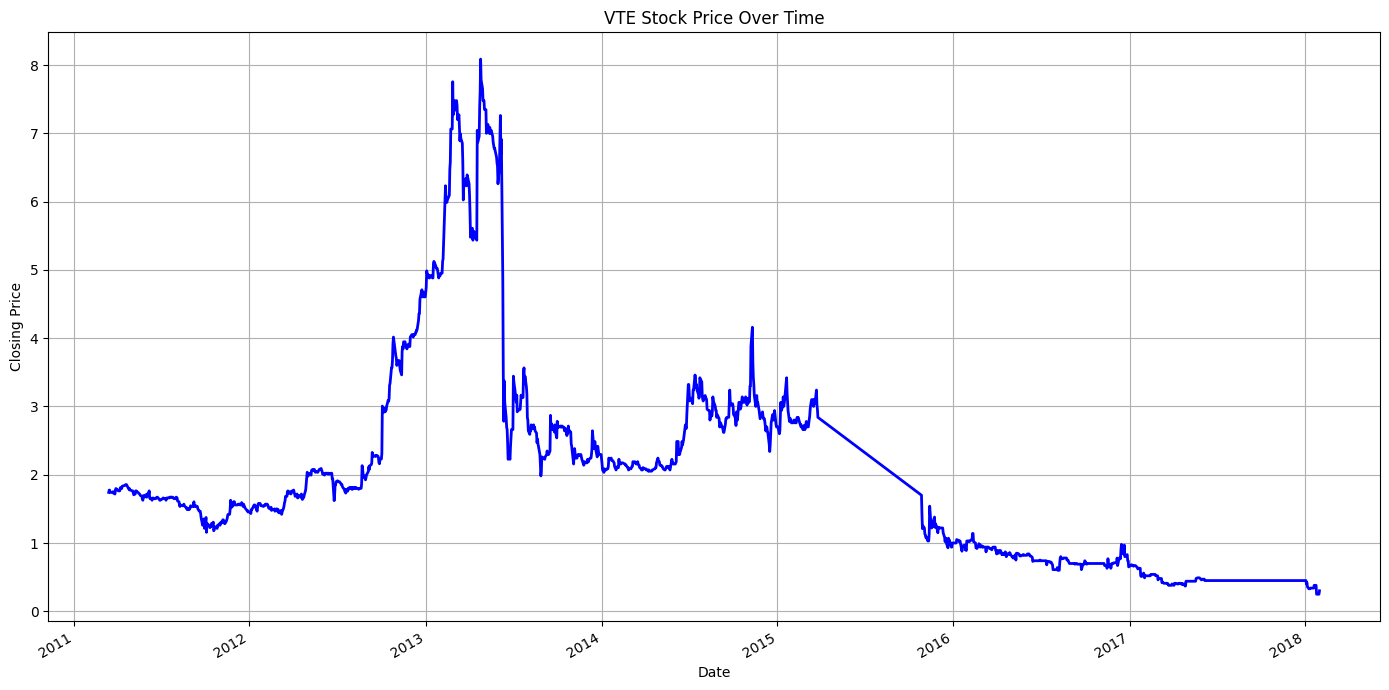

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-03-15 00:00:00-04:00,1.76351,1.78642,1.74061,1.74061,3466655,0.0,0.0
2011-03-16 00:00:00-04:00,1.77496,1.90093,1.76351,1.77496,11299244,0.0,0.0
2011-03-17 00:00:00-04:00,1.78642,1.84367,1.76351,1.77496,11013514,0.0,0.0
2011-03-18 00:00:00-04:00,1.78642,1.79787,1.74061,1.74061,4015234,0.0,0.0
2011-03-21 00:00:00-04:00,1.76351,1.76351,1.74061,1.74061,1582691,0.0,0.0
...,...,...,...,...,...,...,...
2018-01-24 00:00:00-05:00,0.25000,0.25000,0.25000,0.25000,3060,0.0,0.0
2018-01-25 00:00:00-05:00,0.25000,0.25000,0.25000,0.25000,400,0.0,0.0
2018-01-26 00:00:00-05:00,0.25000,0.25000,0.25000,0.25000,0,0.0,0.0


In [ ]:
def plot_stock_price_with_table(ticker, start_date=None, end_date=None):
    # Fetch data
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)

    # Check if the data is empty
    if data.empty:
        print("No data found for the specified date range!")
        return

    # Plotting the data
    plt.figure(figsize=(14, 7))
    data['Close'].plot(title=f'{ticker} Stock Price Over Time', color='blue', linewidth=2.0)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Display the data table below the graph
    display(data)

# Usage
plot_stock_price_with_table("VTE", start_date="2000-09-17", end_date="2023-10-01")


In [ ]:
def get_news(ticker):
    url = f"https://finance.yahoo.com/quote/{ticker}?p={ticker}&.tsrc=fin-srch"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    headlines = []

    for item in soup.find_all('h3', class_='Mb(5px)'):
        link = item.a['href']
        title = item.get_text()
        headlines.append((title, link))

    return headlines

In [ ]:
# Fetch and display news headlines
news_data = get_news("AAPL")
for title, link in news_data:
    print(f"{title}: https://finance.yahoo.com{link}")

Apple's iPhone 15 underperforms in China compared to last model: https://finance.yahoo.com/video/apples-iphone-15-underperforms-china-205142261.html
Big tech earnings: What to expect from Q3 results: https://finance.yahoo.com/video/big-tech-earnings-expect-q3-161037850.html
Google’s Deals Lock Up 50% of US Searches, DOJ Expert Says: https://finance.yahoo.com/news/google-deals-lock-50-us-183243970.html
Apple's iPhone can actually diagnose this common health issue: https://finance.yahoo.com/m/653b5cf2-f4b8-3766-8756-377a71b023e1/apple-s-iphone-can-actually.html
Bitcoin's ETF Approval Rumor, Pfizer Slashes Annual Outlook, Activist Shareholder Shakes Up News Corp's Status Quo: Today's Top Stories: https://finance.yahoo.com/news/bitcoins-etf-approval-rumor-pfizer-163510133.html
Microsoft Gets a Lift as Apple iPhone Sales Scrutinized: https://finance.yahoo.com/m/1efd1d40-3e76-3579-a727-4e067ae83d79/microsoft-gets-a-lift-as.html
Better Artificial Intelligence (AI) Stock: Apple vs. Microsoft: 

In [ ]:
stock = yf.Ticker("VTE")
data = stock.history("VTE","2023-09-01","2023-10-01")

#dataframe
df = pd.DataFrame(data)


ERROR:yfinance:VTE: Invalid input - interval=2023-09-01 is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
